In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

## Starting concentrations for runs:

In [64]:
runs = {'F': {1: {'a': 0.0348, 'b': 0.0252, 'cal': 1},
  2: {'a': 0.0587, 'b': 0.0278, 'cal': 0},
  3: {'a': 0.025, 'b': 0.0205, 'cal': 0}},
 'Cl': {1: {'a': 0.0759, 'b': 0.022, 'cal': 1},
  2: {'a': 0.0415, 'b': 0.0255, 'cal': 0},
  3: {'a': 0.0221, 'b': 0.0238, 'cal': 0}},
 'MeO': {1: {'a': 0.0348, 'b': 0.0259, 'cal': 1},
  2: {'a': 0.039, 'b': 0.0202, 'cal': 1},
  3: {'a': 0.0293, 'b': 0.023, 'cal': 0},
  4: {'a': 0.0277, 'b': 0.019, 'cal': 0},
  5: {'a': 0.026, 'b': 0.0086, 'cal': 0}},
 'CO2Me': {1: {'a': 0.0227, 'b': 0.0243, 'cal': 0},
  2: {'a': 0.0278, 'b': 0.0246, 'cal': 0},
  3: {'a': 0.0221, 'b': 0.0199, 'cal': 0}},
 'Me': {1: {'a': 0.0187, 'b': 0.0225, 'cal': 0},
  2: {'a': 0.0313, 'b': 0.0255, 'cal': 0},
  3: {'a': 0.0245, 'b': 0.0203, 'cal': 0}},
 'CF3': {1: {'a': 0.038, 'b': 0.0256, 'cal': 1},
  2: {'a': 0.0388, 'b': 0.0211, 'cal': 1}},
    'trityl': {
        1: {'a':0.0610,'b':0.0210,'cal':0},
        2: {'a':0.0179,'b':0.0245,'cal':0},
        1: {'a':0.0610,'b':0.0121,'cal':0}
    },
    'clacetophenone': {
        1: {'a':0.0235,'b':0.0227,'cal':0}
       }
       }

### Run conductivity-concentration calibration notebook

In [ ]:
%run acetone_cal.ipynb

In [68]:
# integrated second order irreversible expression
def c_second(x,a,b,k):
  return (a - b) * ( 1 / ( 1 - b/a * np.exp( - k * x * (a - b) ) ) - 1 )

## Chose subsitutent and run for plotting:

In [81]:
while True:
    sub = input('Enter which subsituent you wish to get the data for: ').upper()
    run = input('Enter which run you wish to get the data for: ')

    try:
        with open(f'acetone_50_{sub}_{run}.csv') as f:
            reader = csv.reader(f)
            data = np.array(list(reader)).astype(float)
        break
    except:
        print('Invalid run')

a = runs[sub][int(run)]['a']
b = runs[sub][int(run)]['b']
cal = runs[sub][int(run)]['cal']
if cal == 0:
    popt_cal = popt50n_i
else:
    popt_cal = popt50_i

Enter which subsituent you wish to get the data for:  f
Enter which run you wish to get the data for:  1


## Plot Conductivity

[]

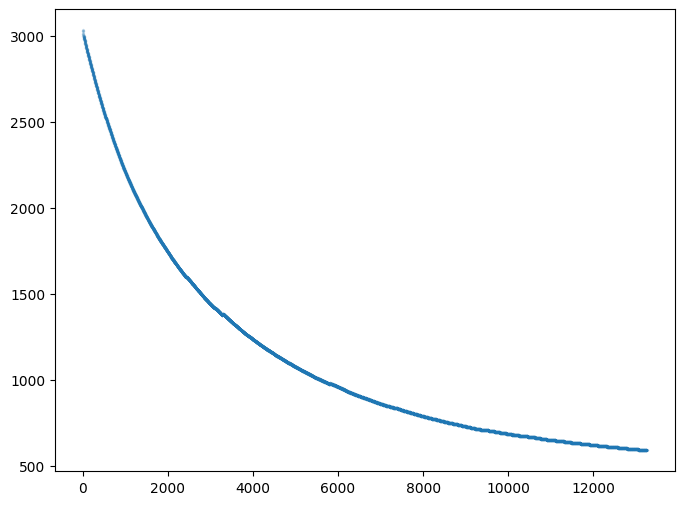

In [85]:
plt.figure(figsize=(8,6))

x = data[:,0]
y = data[:,1]

plt.scatter(x,y,s=2,alpha=0.1,marker='o')
plt.plot()

## Plot Concentration

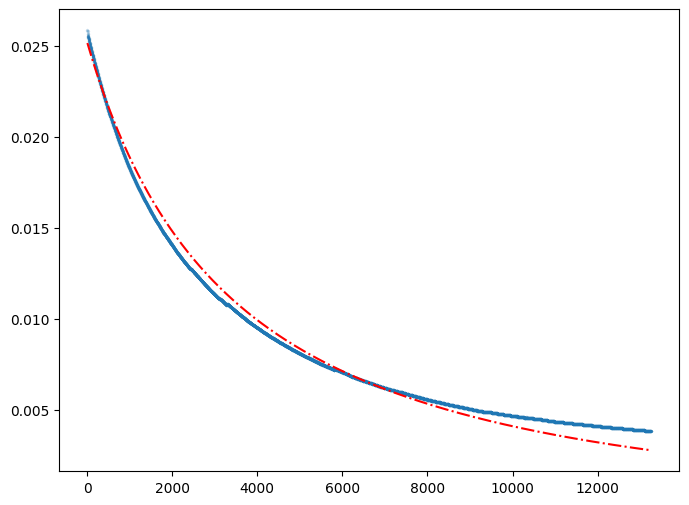

In [86]:
y_c = np.array(inv_quad_p(y,*popt_cal))
plt.figure(figsize=(8,6))

plt.scatter(x,y_c,s=2,alpha=0.1,marker='o')

popt, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), x , y_c, p0=[0.0005])
k2 = popt[0]
plt.plot(x,c_second(x,a,b,k2),'r-.')

plt.show()
